### Previsões com KERAS

### Importação de bibliotecas

In [1]:
import pandas as pd

### Carregando a base de dados

In [2]:
passageiros = pd.read_csv('dados/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


#### Na coluna tempo, temos os anos e, na parte decimal, os meses.

### Ajustando o tamanho dos gráficos de todo o código

In [3]:
import matplotlib as mpl

In [4]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

### Visualizando a série temporal com o lineplot, do seaborn

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

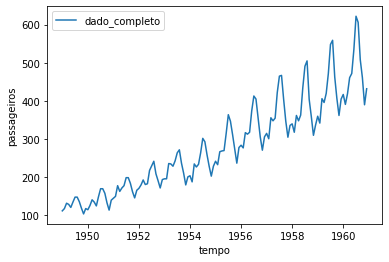

In [6]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros,
             label = 'dado_completo')

### Escalando os dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Ajustando os dados para escalá-los. 

# É mais fácil fazer previsões com números numa mesma escala.

# instanciando o modelo
sc = StandardScaler()

# Treinando com nossos dados
sc.fit(passageiros)

StandardScaler()

In [9]:
# Transformando os dados

dado_escalado  = sc.transform(passageiros)

### Dividindo os dados em x e Y. Os valores de entrada (x) serão os anos (coluna 0) e os valores de saída desejados (y) será a quantidade de passageiros (coluna 1)

In [10]:
# Tudo da coluna 0
x = dado_escalado[:, 0]

# Tudo da coluna 1

y = dado_escalado[:, 1]

### Plotando o grafico novamente, mas agora com os dados escalados

Text(0.5, 0, 'Data')

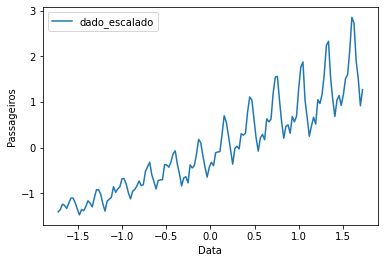

In [11]:
import matplotlib.pyplot as plt

# Quero adicionar labels nos eixos
sns.lineplot(x = x, y = y, label = 'dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

### Dividir os dados em dados de treino e dados de teste

In [12]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = int(len(passageiros) - tamanho_treino)

In [13]:
# Dividindo:

x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

### Plotando os dados de TREINO e de TESTE

<AxesSubplot:>

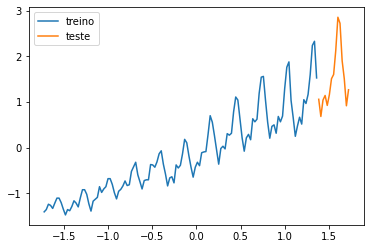

In [14]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')

### Criando uma sequência de camadas - Sequential()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
#!pip install tensorflow

In [35]:
regressor = Sequential()

In [18]:
# Adicionando uma camada Dense

regressor.add(Dense(1, input_dim = 1, kernel_initializer='Ones',
                    activation = 'linear', use_bias = False))

In [19]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [21]:
regressor.fit(x_treino,y_treino)

5/5 [==============================] - 0s 1ms/step - loss: 0.1285


In [22]:
y_predict = regressor.predict(x_treino)

<AxesSubplot:>

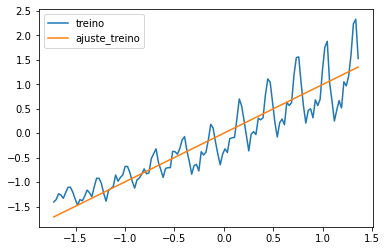

In [23]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste_treino')

### Visualizando os dados novamente na escala normal

In [24]:
# Criando uma variável temporária:

temp = {'tempo' : x_treino, 'passageiros': y_predict[:,0]}

resultados = pd.DataFrame(data = temp)
resultados

,tempo,passageiros
0,-1.720064,-1.712864
1,-1.696007,-1.688908
2,-1.671950,-1.664952
3,-1.647894,-1.640996
4,-1.623837,-1.617040
...,...,...
124,1.262984,1.257697
125,1.287041,1.281654
126,1.311098,1.305610
127,1.335155,1.329566


In [25]:
# Transformando os dados:

resultado_transformado = sc.inverse_transform(resultados)

In [26]:
resultado_transformado = pd.DataFrame(data=resultado_transformado)
resultado_transformado.columns = ['tempo', 'passageiros']
resultado_transformado

,tempo,passageiros
0,1949.000000,75.527342
1,1949.083333,78.391281
2,1949.166667,81.255219
3,1949.250000,84.119143
4,1949.333333,86.983081
...,...,...
124,1959.333333,430.655137
125,1959.416667,433.519076
126,1959.500000,436.383000
127,1959.583333,439.246924


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

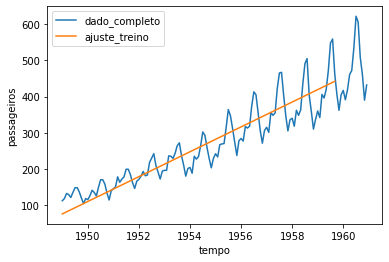

In [27]:
# plotando o resultado correto:

sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_transformado, label = 'ajuste_treino')

### Note que a linha de regressão abrange os dados de TREINO. Quero uma linha regressora que abranja também os dados de TESTE, ou seja, faça uma predição.

In [28]:
y_predict_teste = regressor.predict(x_teste)

In [29]:
temp = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=temp)
resultados_teste.columns = ['tempo', 'passageiros']

In [30]:
resultado_transformado_teste = sc.inverse_transform(resultados_teste)

In [31]:
resultado_transformado_teste = pd.DataFrame(data = resultado_transformado_teste)
resultado_transformado_teste.columns = ['tempo', 'passageiros']
resultado_transformado_teste

,tempo,passageiros
0,1959.750000,444.974800
1,1959.833333,447.838739
2,1959.916667,450.702663
3,1960.000000,453.566601
4,1960.083333,456.430539
5,1960.166667,459.294463
6,1960.250000,462.158416
7,1960.333333,465.022340
8,1960.416667,467.886264
9,1960.500000,470.750202


### Plotando a reta de regressão também dos dados de teste:

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

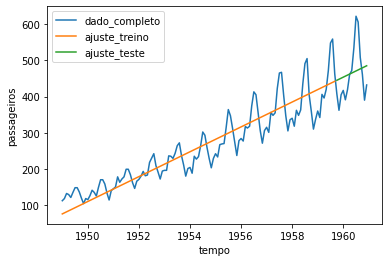

In [32]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_transformado, label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_transformado_teste, label = 'ajuste_teste')

### Criando uma nova rede neural - Rede com mais camadas, porém ainda fornecerá uma previsão LINEAR (veja função de ativação)

In [36]:
regressor2 = Sequential()

In [37]:
# quero 8 neuronios na camada escondida, que é a seguinte a camada de entrada

regressor2.add(Dense(8,input_dim = 1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False)) 

# Criando outra camada escondida com 8 neuronios: (não preciso passar o input_dim pq ele ja pega da camada anterior
regressor2.add(Dense(8, kernel_initializer = 'random_uniform',
               activation = 'linear', use_bias = False))

# Camada de saída:
regressor2.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

In [41]:
# Compilando a rede:

regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [42]:
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Fazendo o treinamento: 
# Valor padrao de epochs é 5

regressor2.fit(x_treino, y_treino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8094
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8087
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8078
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8066
Epoch 5/200
5/5 [==============================] - 0s 902us/step - loss: 0.8048
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8027
Epoch 7/200
5/5 [==============================] - 0s 955us/step - loss: 0.7996
Epoch 8/200
5/5 [==============================] - 0s 903us/step - loss: 0.7955
Epoch 9/200
5/5 [==============================] - 0s 918us/step - loss: 0.7896
Epoch 10/200
5/5 [==============================] - 0s 864us/step - loss: 0.7823
Epoch 11/200
5/5 [==============================] - 0s 866us/step - loss: 0.7721
Epoch 12/200
5/5 [==============================] - 0s 864us/step - loss: 0.7605
Epoch 13/200
5/5 [=============================

In [46]:
# Fazendo o predict para os valores de TREINO

y_predict = regressor2.predict(x_treino)

In [45]:
# Fazendo o predict para os valores de TESTE

y_predict_teste = regressor2.predict(x_teste)

<AxesSubplot:>

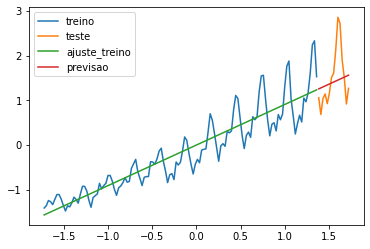

In [49]:
# Plotando os resultados:

# Plotando primeiro os dados
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')

# Plotando as previsões:
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste_treino')
sns.lineplot(x = x_teste, y = y_predict_teste[:,0], label = 'previsao')

### Previsões não lineares

In [50]:
regressor3 = Sequential()

In [51]:
# Primeira camada escondida, com 8 neuronios e utilizando a função de ativação sigmoide:
regressor3.add(Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
                    activation = 'sigmoid', use_bias = False))

# Segunda camada escondida, com 8 neuronios e unitilizando a função de ativação sigmoide:
regressor3.add(Dense(8, kernel_initializer = 'random_uniform',
                    activation = 'sigmoid', use_bias = False))

# Camada de saída:
regressor3.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))


regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compilando a rede:

regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [55]:
# Treinando o modelo:

regressor3.fit(x_treino, y_treino, epochs = 500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8140
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8088
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8032
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8000
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7973
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7966
Epoch 7/500
5/5 [==============================] - 0s 988us/step - loss: 0.7957
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7948
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7940
Epoch 10/500
5/5 [==============================] - 0s 746us/step - loss: 0.7931
Epoch 11/500
5/5 [==============================] - 0s 733us/step - loss: 0.7923
Epoch 12/500
5/5 [==============================] - 0s 669us/step - loss: 0.7914
Epoch 13/500
5/5 [==============================] - 0

In [56]:
# Fazendo as previsões de TREINO:

y_predict = regressor3.predict(x_treino)

# Fazendo as previsões de TESTE:

y_predict_teste = regressor3.predict(x_teste)

<AxesSubplot:>

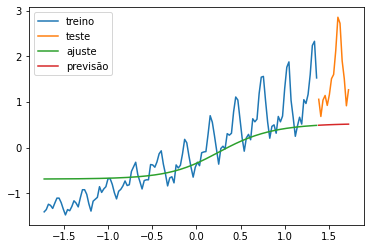

In [57]:
# Plotando os valores:

# Valores de treino:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')

# Valores de teste:
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')

# Previsões de treino:
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste')

# Previsões:
sns.lineplot(x = x_teste, y = y_predict_teste[:,0], label = 'previsão')


### Note que a previsão NÃO ficou boa.

## Notas:

### Otimizador ADAM: É o responsável pela atualização dos pesos. Este algoritmo é exemplo de um método de gradiente descendente estocástico desenvolvido para ser computacionalmente eficiente. Para saber como funciona: [TEXTO](https://cursos.alura.com.br/course/rede-neural-numpy/task/57827)

### Função de custo (losses): Em conjunto com o algoritmo de otimização precisamos utilizar uma função de custo que vai medir quanto a nossa estimativa é diferente do valor conhecido. O algoritmo de otimização busca minimizar o valor da função de custo. Diferentes funções de custo presentes no KERAS: [Funções de custo](https://www.tensorflow.org/api_docs/python/tf/keras/losses)